In [1]:
from transformers import BertConfig, BertForMaskedLM

from my_transformer import MyBert

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

def get_n_params(model):
    return sum(map(lambda p: np.prod(p.size()), model.parameters()))

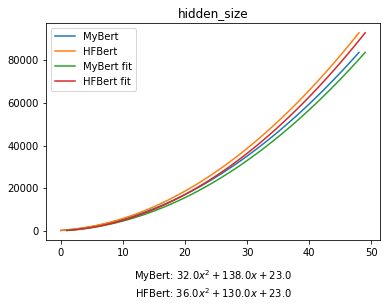

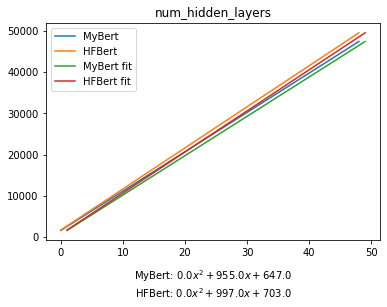

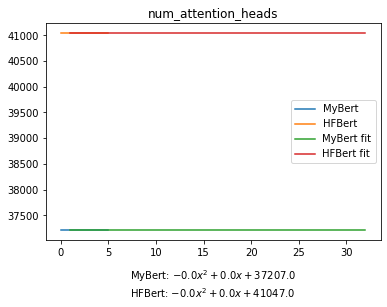

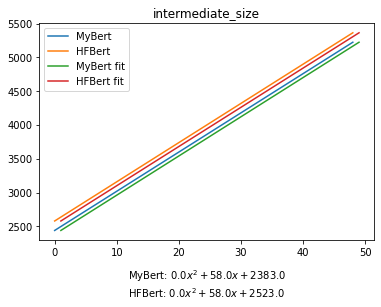

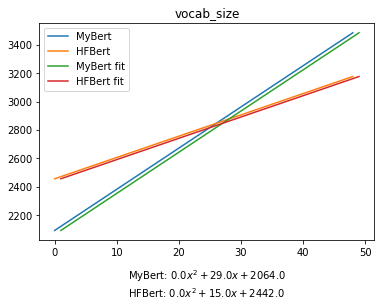

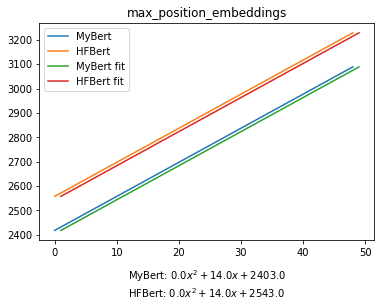

In [3]:
for label in ["hidden_size", "num_hidden_layers", "num_attention_heads", "intermediate_size", "vocab_size", "max_position_embeddings"]:
    my_params = []
    hf_params = []
    x = []
    for i in range(1, 50):
        if label != "num_attention_heads":
            x.append(i)
        config = BertConfig(
            # vocab_size=tokenizer.vocab_size,
            hidden_size=14,
            num_hidden_layers=2,
            num_attention_heads=2,
            intermediate_size=3,
            vocab_size=17,
            max_position_embeddings=11,
            hidden_act="gelu",
            hidden_dropout_prob=0.1,
            attention_probs_dropout_prob=0.1,
        )
        config.__setattr__(label, i)
        if label == "num_attention_heads":
            if i & (i - 1) != 0:
                continue
            config.hidden_size = 64
            x = [1, 2, 4, 8, 16, 32]
        elif label == "hidden_size":
            config.hidden_size = i*config.num_attention_heads


        my_bert_params = get_n_params(MyBert(config))
        # print(f"MyBert params: {my_bert_params}")
        hf_bert_params = get_n_params(BertForMaskedLM(config))
        # print(f"HFBert params: {hf_bert_params}")
        diff = my_bert_params - hf_bert_params
        # print("Diff", diff)

        my_params.append(my_bert_params)
        hf_params.append(hf_bert_params)

    
    # use numpy polyfit to get the coefficients of the polynomial
    x = np.array(x)
    y = np.array(my_params)
    my_fit = np.polyfit(x, y, 2)
    

    # now hf_params...
    y = np.array(hf_params)
    hf_fit = np.polyfit(x, y, 2)

    
    # plot the results
    plt.plot(my_params, label="MyBert")
    plt.plot(hf_params, label="HFBert")

    # annotate the lines with the polynomial fits
    plt.plot(x, np.poly1d(my_fit)(x), label="MyBert fit")
    plt.plot(x, np.poly1d(hf_fit)(x), label="HFBert fit")

    # annotate with the coefficients of the plot as an equation
    plt.text(
        0.5,
        -0.2,
        "MyBert: $%.1f x^2 + %.1f x + %.1f$\nHFBert: $%.1f x^2 + %.1f x + %.1f$" % (my_fit[0], my_fit[1], my_fit[2], hf_fit[0], hf_fit[1], hf_fit[2]),
        horizontalalignment="center",
        verticalalignment="center",
        transform=plt.gca().transAxes,
    )

    plt.legend()
    plt.title(label)
    plt.show()

In [4]:
def get_n_params(model):
    return sum(map(lambda p: np.prod(p.size()), model.parameters()))

def get_n_params(model):
    pp=0
    for name, p in list(model.named_parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

def predict_hf_params(config):
    a = 7 + 2 * config.intermediate_size * 2 * config.hidden_size
    b = 7 + config.vocab_size * config.max_position_embeddings + config.hidden_size
    c = config.num_attention_heads * config.intermediate_size + config.vocab_size

    return config.hidden_size * (a + b) + c

def predict_hf_params2(config):
    d = config.hidden_size
    t = config.max_position_embeddings
    v = config.vocab_size
    i = config.intermediate_size
    h = config.num_hidden_layers

    # 7d + vd + td + h(6d + 2id + d^2 + i + 3(d^2 + d)) + d^2 + v
    return 7*d + v*d + t*d + h*(6*d + 2*i*d + d**2 + i + 3*(d**2 + d)) + d**2 + v

def predict_hf_params3(config):
    d = config.hidden_size
    t = config.max_position_embeddings
    v = config.vocab_size
    i = config.intermediate_size
    h = config.num_hidden_layers

    # 7d + 9hd + vd + td + d^2 + 4hd^2 + 2hdi + hi + v
    return 7*d + 9*h*d + v*d + t*d + d**2 + 4*h*d**2 + 2*h*d*i + h*i + v

config = BertConfig(
            hidden_size=14,
            num_hidden_layers=2,
            num_attention_heads=2,
            intermediate_size=3,
            vocab_size=17,
            max_position_embeddings=11,
            hidden_act="gelu",
            hidden_dropout_prob=0.1,
            attention_probs_dropout_prob=0.1,
        )

bert = MyBert(config)
# bert = BertForMaskedLM(config)



# print("actual params:", get_n_params(bert))
# print("predicted params2:", predict_hf_params2(config))
# print("predicted params3:", predict_hf_params3(config))


for name, param in bert.named_parameters():
    print(name, param.size())

positional_embeddings.position_encodings torch.Size([1, 11, 14])
positional_embeddings.embeddings.weight torch.Size([17, 14])
transformer_body.layers.0.multi_head_attn.weights torch.Size([1, 2, 3, 14, 7])
transformer_body.layers.0.multi_head_attn.linear.weight torch.Size([14, 14])
transformer_body.layers.0.multi_head_attn.linear.bias torch.Size([14])
transformer_body.layers.0.layer_norm1.weight torch.Size([14])
transformer_body.layers.0.layer_norm1.bias torch.Size([14])
transformer_body.layers.0.linear1.weight torch.Size([3, 14])
transformer_body.layers.0.linear1.bias torch.Size([3])
transformer_body.layers.0.linear2.weight torch.Size([14, 3])
transformer_body.layers.0.linear2.bias torch.Size([14])
transformer_body.layers.0.layer_norm2.weight torch.Size([14])
transformer_body.layers.0.layer_norm2.bias torch.Size([14])
transformer_body.layers.1.multi_head_attn.weights torch.Size([1, 2, 3, 14, 7])
transformer_body.layers.1.multi_head_attn.linear.weight torch.Size([14, 14])
transformer_bo